## Question 3

In [1]:
import numpy as np
from scipy.linalg import solve_triangular as forward_sub
import matplotlib.pyplot as plt
import time

In [2]:
def check_diag_dom(A,n):
    """
    Checks to ensure that the matrix A is diagonally dominant.
    """
    is_diagonally_dominant = True
    for i in range(n):
        row_sum = np.sum(np.abs(A[i, :])) - np.abs(A[i, i])
        if row_sum > np.abs(A[i, i]):
            is_diagonally_dominant = False
            break
    
    if not is_diagonally_dominant:
        print("Warning: Matrix is not diagonally dominant. Convergence is not guaranteed.")

        
def get_D_L_U(A):
    """
    Returns the matrices:
        D: diag(A)
        U: upper-triangular(A)
        L: lower-triangular(A)
    """
    D = np.diag(np.diag(A))
    L = np.tril(A,k=-1)
    U = np.triu(A,k=1)
    
    return D, L, U


def compute_norm_residual(A,b,x):
    """Returns the norm of the residual."""
    return np.linalg.norm( np.dot(A, x) - b )


def forward_substitution(L, b):
    """
    Solves the system of linear equations Lx = b using forward substitution.

    Args:
        L (numpy.ndarray): The lower triangular matrix L.
        b (numpy.ndarray): The right-hand side vector b.

    Returns:
        numpy.ndarray: The solution vector x.
    """

    n = L.shape[0]
    x = np.zeros(n)

    for i in range(n):
        for j in range(i):
            x[i] -= L[i, j] * x[j]

        x[i] = b[i] / L[i, i]

    return x


def SOR_formula(x, D, L, U, omega):
    """Computes the new x using the SOR formula as provided in the notes"""
    # Right Hand Side (RHS)
    RHS = omega*b - (omega*U + (omega - 1)*D)@x
    # Left Hand Side (LHS)
    LHS = D + omega*L
    new_x = forward_sub(LHS, RHS, lower=True)
    
    return new_x

In [3]:
def gauss_seidel_method(A, b, x0, max_iter, tol, omega=1.0, get_res=False):
    """
    Solves a system of linear equations Ax = b using the Gauss-Seidel method.

    Parameters:
        A (ndarray): The coefficient matrix.
        b (ndarray): The right-hand side vector.
        x0 (ndarray): The initial guess for the solution vector.
        max_iter (int): The maximum number of iterations.
        tol (float): The tolerance for convergence.
        omega (float): The relaxation parameter (default: 1.0).
        get_res (bool): The variable that allows us choose if we want to keep
                        track of the residuals (default: False).

    Returns:
        ndarray: The approximate solution vector or None if convergence is not achieved.
    """

    n = len(x0)

    # Check for diagonally dominant matrix
    check_diag_dom(A,n)

    # Initialize variables
    x = x0
    counter = 0
    D, L, U = get_D_L_U(A)
    norm_residual = compute_norm_residual(A,b,x)
    
    if get_res:
        residuals = []
        residuals.append(norm_residual)

    # Iterate until convergence or maximum number of iterations is reached
    while (counter<max_iter) and (norm_residual > tol):
        
        x = SOR_formula(x, D, L, U, omega)
        norm_residual = compute_norm_residual(A,b,x)
        if get_res:
            residuals.append(norm_residual)
        
        counter += 1 # increase counter

    return x if not get_res else (x, residuals)

In [4]:
def test_gauss_seidel_method(A, b, x0, max_iter, tol, omega_values):
    """
    Tests the Gauss-Seidel method with different relaxation parameters.

    Parameters:
        A (ndarray): The coefficient matrix.
        b (ndarray): The right-hand side vector.
        x0 (ndarray): The initial guess for the solution vector.
        max_iter (int): The maximum number of iterations.
        tol (float): The tolerance for convergence.
        omega_values (list): A list of relaxation parameter values to test.

    Returns:
        num_of_iterations: a list holding the number of iterations needed to compute the solution
                            for different values of omega.
    """
    
    # we keep track of the number of iterations needed for each value of omega
    num_of_iterations = []

    for omega in omega_values:
        # Solve system of linear equations using Gauss-Seidel method
        solution, residuals = gauss_seidel_method(A, b, x0, max_iter, tol, omega, get_res=True)
        
        num_of_iterations.append(len(residuals))
        # Check if convergence was achieved
        if (len(residuals) >= max_iter):
            print(f"Convergence not achieved for omega = {omega:.2f}")
        else:
            print(f"Solution for omega = {omega:.2f}:\n{np.round(solution,4)}")

            # Compute norm of residual
            plt.plot(range(len(residuals)), residuals, '-*')
            plt.xlabel("iteration")
            plt.ylabel("$||Ax* - b||_2$")
            plt.title(f"Residual plot for $\omega$={omega:.2f}")
            plt.show()
            
        print()

    return num_of_iterations

### 3(a)

Convergence not achieved for omega = 0.00

Solution for omega = 0.20:
[[-0.3728]
 [ 0.496 ]
 [-0.7941]]


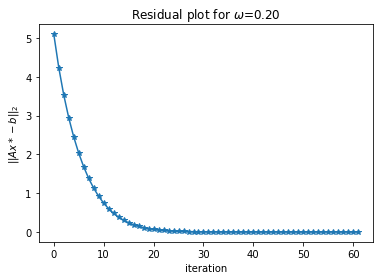


Solution for omega = 0.40:
[[-0.3728]
 [ 0.496 ]
 [-0.7941]]


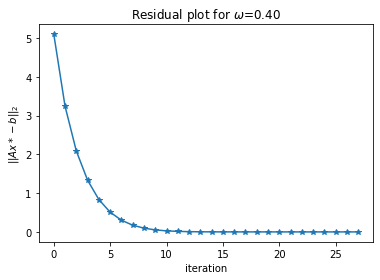


Solution for omega = 0.60:
[[-0.3728]
 [ 0.496 ]
 [-0.7941]]


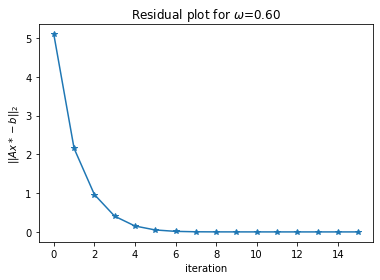


Solution for omega = 0.80:
[[-0.3728]
 [ 0.496 ]
 [-0.7941]]


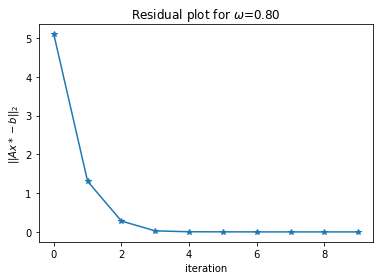


Solution for omega = 1.00:
[[-0.3728]
 [ 0.496 ]
 [-0.7941]]


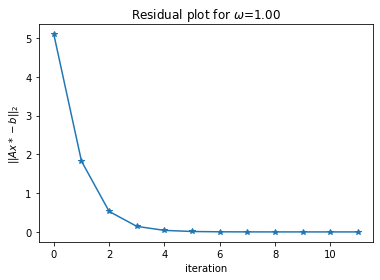


Solution for omega = 1.20:
[[-0.3728]
 [ 0.496 ]
 [-0.7941]]


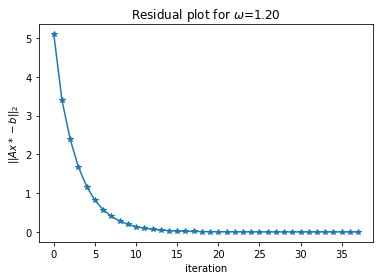


Convergence not achieved for omega = 1.40



In [5]:
A = np.array([[7, 2, 3],
             [2, 4, 0.3],
             [5, 0.2, -6]])
b = np.array([-4, 1, 3]).reshape(3,1)
x0 = np.array([0,0,0]).reshape(3,1)
max_iter = 1000
tol = 1e-5
omega_values = np.linspace(0,1.4,8) 

num_of_iterations = test_gauss_seidel_method(A, b, x0, max_iter, tol, omega_values)

### 3(b)

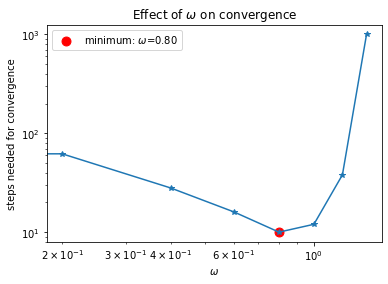

In [6]:
plt.loglog(omega_values, num_of_iterations, '-*')
plt.scatter(omega_values[np.argmin(num_of_iterations)],
            np.min(num_of_iterations), marker='o',c='r',s=80,
           label=f"minimum: $\omega$={omega_values[np.argmin(num_of_iterations)]:.2f}")
plt.xlabel("$\omega$")
plt.ylabel("steps needed for convergence")
plt.title(f"Effect of $\omega$ on convergence")
plt.legend()
plt.show()

In [7]:
def jacobi_method(A, b, x0, max_iter=1000, tol=1e-5):
    
    x0 = x0.squeeze(-1)
    b = b.squeeze(-1)
    
    # Check for diagonally dominant matrix
    n = len(x0)
    check_diag_dom(A,n)
   
    # Initialize variables for iteration
    x = x0.copy()
    D = np.diag(A) # Also considered as M
    N = A - np.diag(D) # Also considered as L + U
    diff = np.inf
    iter_count = 0

  
    # Perform Jacobi iterations until convergence or maximum iterations reached
    while diff > tol and iter_count < max_iter:
        
        # Update each element of x using the Jacobi formula
        latest_x = (b - np.dot(N, x)) / D
        
        # Calculate the difference between the current and updated solutions
        diff = np.linalg.norm(latest_x - x)
        
        # Update the current solution
        x = latest_x
        iter_count += 1
        
    if iter_count >= max_iter:
        print("Maximum iteration reached!")
        print(r"$||x_{k+1} - x_k||_2$"+f"={diff:.4f} > tol = {tol}")
        return x0
        
    return x


In [8]:
def compare_gauss_seidel_and_jacobi_methods(A, b, x0, max_iter, tol, omega):
    """
    Compares the performance of the Gauss-Seidel and Jacobi methods.

    Parameters:
        A (ndarray): The coefficient matrix.
        b (ndarray): The right-hand side vector.
        x0 (ndarray): The initial guess for the solution vector.
        max_iter (int): The maximum number of iterations.
        tol (float): The tolerance for convergence.
        omega (float): The relaxation parameter.

    Returns:
        None
    """

    # Solve system of linear equations using Gauss-Seidel method
    start = time.time()
    gauss_seidel_solution = gauss_seidel_method(A, b, x0, max_iter, tol, omega)
    end = time.time()
    print(f"\nGauss-Siedel: {end-start:.4f} sec.")
    
    # Solve system of linear equations using Jacobi
    start = time.time()
    jacobi_solution = jacobi_method(A, b, x0, max_iter, tol)
    end = time.time()
    print(f"\nJacobi: {end-start:.4f} sec.")
    
    # Solve with Numpy
    start = time.time()
    numpy_solution = np.linalg.solve(A,b)
    end = time.time()
    print(f"\nNumpy: {end-start:.4f} sec.\n")
    
    print(f"Numpy:\n{numpy_solution}\n")
    print(f"gauss_seidel:\n{gauss_seidel_solution}\n")
    print(f"jacobi:\n{jacobi_solution.reshape(3,1)}")
    
    # difference between solutions
    diff_gs_np = np.linalg.norm(gauss_seidel_solution - numpy_solution)
    diff_jac_np = np.linalg.norm(jacobi_solution - numpy_solution)
    
    np_gauss_siedel = [np.round(diff_gs_np,i) for i in range(1,10)]
    np_jacobi = [np.round(diff_jac_np,i) for i in range(1,10)]
    
    plt.plot(range(1,10), np_gauss_siedel, '-*', label="Gauss-Siedel")
    plt.plot(range(1,10), np_jacobi, '-+', label="Jacobi")
    plt.xlabel("Decimal places")
    plt.ylabel("Error")
    plt.title(f"Comparing Accuracy: Gauss-Siedel vs Jacobi")
    plt.legend()
    plt.show()
    

### 3(c)


Gauss-Siedel: 0.0011 sec.

Jacobi: 0.0008 sec.

Numpy: 0.0001 sec.

Numpy:
[[-0.37278993]
 [ 0.49595445]
 [-0.79412646]]

gauss_seidel:
[[-0.37278966]
 [ 0.49595296]
 [-0.79412561]]

jacobi:
[[-0.37279056]
 [ 0.49595591]
 [-0.79412944]]


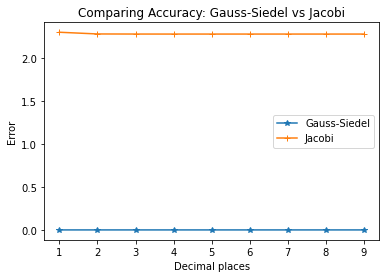

In [9]:
omega = 0.8
compare_gauss_seidel_and_jacobi_methods(A, b, x0, max_iter, tol, omega)